In [1]:
import pandas as pd
from glob import glob
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.max_colwidth',100)

In [3]:
src_data = r'c:\Users\jaromir\OneDrive\UoM\100_Disertation\02_SrcData'

In [4]:
stock_price = pd.read_csv(src_data+'/stock_price.csv')

In [5]:
filenames = glob(src_data+'\$*.csv')
df = pd.DataFrame()

for file in filenames:
    # read a csv from source folder
    data = pd.read_csv(file, encoding = 'utf-8')
    # parese the name of the file to extract the ticker name and save it 
    # as a new attribute
    data['ticker'] = re.search(r'\$[A-Z]+_',file).group(0)[1:-1]
    # concatenate the csv with the rest of the DataFrame
    df = pd.concat([df, data], axis=0, sort=False, ignore_index = True)
    df.drop(labels = 'Unnamed: 0', inplace=True, axis=1)

In [6]:
# Load fiannce data
stock_price = pd.read_csv(src_data+'/stock_price.csv')

In [7]:
# Tokenization
from nltk.tokenize import sent_tokenize, word_tokenize, TweetTokenizer
from nltk.tokenize.casual import TweetTokenizer as CasualTweetTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from functools import reduce
from collections import Counter

In [8]:
# POS tagging
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jaromir\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [9]:
df.shape

(50000, 16)

In [10]:
# create a copy with fewer attributes
df_text = df[['text','ticker']]

In [11]:
df_text.head(3)

,text,ticker
0,$AMZN $GOOG $AAPL $MSFT Google is the best.... $NKLA $NFLX $DIS $SPX $FB $UBER $LYFT $COST $SPY ...,DIS
1,A lot of people ask me what I’m currently in and I’ll be Transparent (goes in order by Portfolio...,DIS
2,"Together Everyone Achieves More‼️LIVE! FREE day trade alerts, swing trade alerts, as well as wat...",DIS


In [12]:
# make a subsample for faster handling
# select a random sample of 5 tweets for each ticker
smpl = df_text.groupby('ticker').apply(lambda x: x.sample(n=5, random_state = 10))

# get rid of multi-level index
smpl.reset_index(drop=True, inplace=True)

# print the results
smpl

,text,ticker
0,Market cap is already higher than $dis paid for Jim Henson’s muppets but sure buy out a company ...,DIS
1,$DIS what a move!!!! 💪🏻 all out at $104.95 target. Now wait until $95 to play again $SPY $MSFT $...,DIS
2,$T $DIS $AMC - California sets up movie theater reopenings https://seekingalpha.com/news/3581360...,DIS
3,LONG 100 $JNJ 70 $XOM 50 $V 100 $BAC 60 $MA 100 $DIS 100 $C 100 $ADBE 100 $PYPL 100 $CRM 100 $AV...,DIS
4,"I don't like big dollar stocks, but I'm watching $DIS for a possible short term entry. With open...",DIS
5,$MSIM Family taking over net worth $500 million. Huh?💸📈 #STOCKS #blockchain #Crypto #bitcoin #XR...,JPM
6,"Really hard times are ahead! Your fav restaurant and coffee shop will close, kids won't go back ...",JPM
7,$MISM GOING! UNNOTICED silent R/MERGER!💸📈🛒✈🍾 $AAPL $AMD $AMRN $AAL $BAC $AMZN $MSFT $BA $ABT $TS...,JPM
8,"GD Entertainment and Technology sets relaunch of re-imagined prepaid ‘Dream Card' Self-Use, Mill...",JPM
9,Here's what the traders are eyeing heading into the weekend. $JPM $GDX $AAPL $AGN,JPM


In [13]:
smpl.loc[2,'text']

'$T $DIS $AMC - California sets up movie theater reopenings https://seekingalpha.com/news/3581360-california-sets-up-movie-theater-reopenings?source=feed_f&amp;utm_campaign=twitter_automated&amp;utm_content=news&amp;utm_medium=social&amp;utm_source=twitter_automated'

In [14]:
# remove duplicates
smpl.drop_duplicates(subset ="text", keep = 'first', inplace = True)
smpl.reset_index(drop=True, inplace=True)

### Remove unwanted strings and words

### Ideas for clenaing the text : 


Clean the text  
text = sub(r"[^A-Za-z0-9^,!?.\/'+]", " ", text)  
text = sub(r"\+", " plus ", text)  
text = sub(r",", " ", text)  
text = sub(r"\.", " ", text)   
text = sub(r"!", " ! ", text)  
text = sub(r"\?", " ? ", text)  
text = sub(r"'", " ", text)  
text = sub(r":", " : ", text)  
text = sub(r"\s{2,}", " ", text)  


dropping rows with missing (NaN) values,
dropping duplicated rows,
removing rows with rate equal to 0, as it contained some error, probably from the data gathering phase,
replacing polish letters with use of unidecode package,
replacing all non-alphanumeric signs, punctuation signs, and duplicated white spaces with a single white space
retaining all rows with sentences with a length of at least 2 words.

https://towardsdatascience.com/unsupervised-sentiment-analysis-a38bf1906483

to eliminate double counting same words, you can also implement a spell checker 
https://medium.com/@thomasdecaux/build-a-spell-checker-with-word2vec-data-with-python-5438a9343afd



In [15]:
# remove urls
url_filter = re.compile(r"www.[\w\d]+.\w+|http://\S+|https://\S+")
re.sub(url_filter, "",smpl.loc[22,'text'])

'#Options Flow Grid Update $XOM #OptionsTrading Exxon Mobil Shares ⬆️0.72% to $46.24 #OptionsFlow #stocks #stock #StockMarket #investing #Investment #energy #Oil #oilandgas #OilPrices #oilprice  '

In [16]:
# remove hashtags
hashtag_filter = re.compile(r"#\w+")
re.sub(hashtag_filter, "",smpl.loc[22,'text'])

' Flow Grid Update $XOM  Exxon Mobil Shares ⬆️0.72% to $46.24            https://apple.co/2XZuTYw https://twitter.com/MinteractApp/status/1265774020248641537?s=20'

In [17]:
# remove mentions
mentions_filter = re.compile(r"@\w+")
re.sub(mentions_filter, "",smpl.loc[1,'text'])

'$DIS what a move!!!! 💪🏻 all out at $104.95 target. Now wait until $95 to play again $SPY $MSFT $AMZN $FB $SBUX $JPM $CMG $JNJ $BABA $NKE $CCL $UNH $NVDA $DIS $VZ $TSLA $QQQ $MSI $WMT $NOW $NFLX $DECK $MELI $BKNG $PLNT $BA $CCL $WYNN $RCL $AAL'

In [18]:
# remove numbers, amounts and dates
number_filter = re.compile(r"""\$[0-9.,]+           # $46.24
                               |-*[0-9.,]+%         # 0.72%, -1.4%
                               |[+-]*\d+            # +71
                                """,
                                re.VERBOSE)
#re.findall(number_filter, smpl.loc[1,'text'])
re.sub(number_filter, " ",smpl.loc[22,'text'])

'#Options Flow Grid Update $XOM #OptionsTrading Exxon Mobil Shares ⬆️  to   #OptionsFlow #stocks #stock #StockMarket #investing #Investment #energy #Oil #oilandgas #OilPrices #oilprice https://apple.co/ XZuTYw https://twitter.com/MinteractApp/status/ ?s= '

In [19]:
# remove special characters
schar_filter = re.compile(r"[+?!,;:.(){}-]")
re.sub(schar_filter, "",smpl.loc[13,'text'])

'CocaCola $KO is currently 14% at $4560 very reflective of the Dow L/t bullish high sugar and caffeine carbonated drinks @JoePiSkates'

In [20]:
def filter_results(document, filter_condition):
    """replace given regEx string with a space"""
    document = re.sub(filter_condition, " ", document)
    return document

In [21]:
filters = [url_filter, hashtag_filter, mentions_filter, number_filter, schar_filter]

In [22]:
def filter_documents(df, filters):
    """filter results for all documents"""
    df.loc[:,'filtered_text'] = df.loc[:,'text']
    for char_filter in filters:       
        df.loc[:,'filtered_text'] = df.loc[:,'filtered_text'].apply(filter_results, args=[char_filter])
    return df

In [23]:
smpl = filter_documents(smpl, filters)

In [24]:
smpl.loc[:5,['text','filtered_text']]

,text,filtered_text
0,Market cap is already higher than $dis paid for Jim Henson’s muppets but sure buy out a company ...,Market cap is already higher than $dis paid for Jim Henson’s muppets but sure buy out a company ...
1,$DIS what a move!!!! 💪🏻 all out at $104.95 target. Now wait until $95 to play again $SPY $MSFT $...,$DIS what a move 💪🏻 all out at target Now wait until to play again $SPY $MSFT $AMZN $FB...
2,$T $DIS $AMC - California sets up movie theater reopenings https://seekingalpha.com/news/3581360...,$T $DIS $AMC California sets up movie theater reopenings
3,LONG 100 $JNJ 70 $XOM 50 $V 100 $BAC 60 $MA 100 $DIS 100 $C 100 $ADBE 100 $PYPL 100 $CRM 100 $AV...,LONG $JNJ $XOM $V $BAC $MA $DIS $C $ADBE $PYPL $CRM $AVGO $ABBV $ACN ...
4,"I don't like big dollar stocks, but I'm watching $DIS for a possible short term entry. With open...",I don't like big dollar stocks but I'm watching $DIS for a possible short term entry With open...
5,$MSIM Family taking over net worth $500 million. Huh?💸📈 #STOCKS #blockchain #Crypto #bitcoin #XR...,$MSIM Family taking over net worth million Huh 💸📈 $TWTR $DWDP $PNC $CVS $BABA $...


### Handle cashtags

In [25]:
# change $ticker to #ticker so that it get tokenized together
ticker_replacement = re.compile(r"\$\w+")

In [26]:
def ticker_handle(df, sub_regex):
    """finds tickers labeled with $ and replace the dollar sign with # so that it doesnt get parsed
    during tokenization"""
    for idx in range(df.shape[0]):
        ticks = re.findall(sub_regex, df.loc[:,'filtered_text'][idx])
        for tick in ticks:
            df.loc[:,'filtered_text'][idx] = df.loc[:,'filtered_text'][idx].replace(tick, "#"+tick[1:])
    return df

In [27]:
smpl = ticker_handle(smpl, ticker_replacement)
smpl[['text','filtered_text']]

,text,filtered_text
0,Market cap is already higher than $dis paid for Jim Henson’s muppets but sure buy out a company ...,Market cap is already higher than #dis paid for Jim Henson’s muppets but sure buy out a company ...
1,$DIS what a move!!!! 💪🏻 all out at $104.95 target. Now wait until $95 to play again $SPY $MSFT $...,#DIS what a move 💪🏻 all out at target Now wait until to play again #SPY #MSFT #AMZN #FB...
2,$T $DIS $AMC - California sets up movie theater reopenings https://seekingalpha.com/news/3581360...,#T #DIS #AMC California sets up movie theater reopenings
3,LONG 100 $JNJ 70 $XOM 50 $V 100 $BAC 60 $MA 100 $DIS 100 $C 100 $ADBE 100 $PYPL 100 $CRM 100 $AV...,LONG #JNJ #XOM #V #BAC #MA #DIS #C #ADBE #PYPL #CRM #AVGO #ABBV #ACN ...
4,"I don't like big dollar stocks, but I'm watching $DIS for a possible short term entry. With open...",I don't like big dollar stocks but I'm watching #DIS for a possible short term entry With open...
5,$MSIM Family taking over net worth $500 million. Huh?💸📈 #STOCKS #blockchain #Crypto #bitcoin #XR...,#MSIM Family taking over net worth million Huh 💸📈 #TWTR #DWDP #PNC #CVS #BABA #...
6,"Really hard times are ahead! Your fav restaurant and coffee shop will close, kids won't go back ...",Really hard times are ahead Your fav restaurant and coffee shop will close kids won't go back ...
7,$MISM GOING! UNNOTICED silent R/MERGER!💸📈🛒✈🍾 $AAPL $AMD $AMRN $AAL $BAC $AMZN $MSFT $BA $ABT $TS...,#MISM GOING UNNOTICED silent R/MERGER 💸📈🛒✈🍾 #AAPL #AMD #AMRN #AAL #BAC #AMZN #MSFT #BA #ABT #TS...
8,"GD Entertainment and Technology sets relaunch of re-imagined prepaid ‘Dream Card' Self-Use, Mill...",GD Entertainment and Technology sets relaunch of re imagined prepaid ‘Dream Card' Self Use Mill...
9,Here's what the traders are eyeing heading into the weekend. $JPM $GDX $AAPL $AGN,Here's what the traders are eyeing heading into the weekend #JPM #GDX #AAPL #AGN


### Tokenization

In [28]:
# Sentence Tokenization
smpl.loc[:,'Sent_Token'] = smpl.filtered_text.apply(lambda x: sent_tokenize(x))

In [29]:
# Word Tokenization
smpl.loc[:,'Word_Token'] = smpl.filtered_text.apply(lambda x: TweetTokenizer().tokenize(x))

In [30]:
smpl[['text','Word_Token']].head()

,text,Word_Token
0,Market cap is already higher than $dis paid for Jim Henson’s muppets but sure buy out a company ...,"[Market, cap, is, already, higher, than, #dis, paid, for, Jim, Henson, ’, s, muppets, but, sure,..."
1,$DIS what a move!!!! 💪🏻 all out at $104.95 target. Now wait until $95 to play again $SPY $MSFT $...,"[#DIS, what, a, move, 💪, 🏻, all, out, at, target, Now, wait, until, to, play, again, #SPY, #MSFT..."
2,$T $DIS $AMC - California sets up movie theater reopenings https://seekingalpha.com/news/3581360...,"[#, T, #DIS, #AMC, California, sets, up, movie, theater, reopenings]"
3,LONG 100 $JNJ 70 $XOM 50 $V 100 $BAC 60 $MA 100 $DIS 100 $C 100 $ADBE 100 $PYPL 100 $CRM 100 $AV...,"[LONG, #JNJ, #XOM, #, V, #BAC, #MA, #DIS, #, C, #ADBE, #PYPL, #CRM, #AVGO, #ABBV, #ACN, #LLY, #I..."
4,"I don't like big dollar stocks, but I'm watching $DIS for a possible short term entry. With open...","[I, don't, like, big, dollar, stocks, but, I'm, watching, #DIS, for, a, possible, short, term, e..."


In [31]:
# Turn everything lower case
def lower_list(list_of_word):
    """ turn all strings into lower case"""
    low_list = [word.lower() for word in list_of_word]
    return low_list

In [32]:
smpl.loc[:,'Word_Token'] = smpl.loc[:,'Word_Token'].apply(lower_list)

In [33]:
# Get rid of stop words
def remove_stopwords(list_of_word):
    """ removes stopwords """
    no_stopwords = [t for t in list_of_word if t not in stopwords.words('english')]
    return no_stopwords

In [34]:
smpl.loc[:,'Word_Token_NS'] = smpl.loc[:,'Word_Token'].apply(remove_stopwords)

In [35]:
smpl[['text','Word_Token_NS']]

,text,Word_Token_NS
0,Market cap is already higher than $dis paid for Jim Henson’s muppets but sure buy out a company ...,"[market, cap, already, higher, #dis, paid, jim, henson, ’, muppets, sure, buy, company, licensin..."
1,$DIS what a move!!!! 💪🏻 all out at $104.95 target. Now wait until $95 to play again $SPY $MSFT $...,"[#dis, move, 💪, 🏻, target, wait, play, #spy, #msft, #amzn, #fb, #sbux, #jpm, #cmg, #jnj, #baba, ..."
2,$T $DIS $AMC - California sets up movie theater reopenings https://seekingalpha.com/news/3581360...,"[#, #dis, #amc, california, sets, movie, theater, reopenings]"
3,LONG 100 $JNJ 70 $XOM 50 $V 100 $BAC 60 $MA 100 $DIS 100 $C 100 $ADBE 100 $PYPL 100 $CRM 100 $AV...,"[long, #jnj, #xom, #, v, #bac, #ma, #dis, #, c, #adbe, #pypl, #crm, #avgo, #abbv, #acn, #lly, #i..."
4,"I don't like big dollar stocks, but I'm watching $DIS for a possible short term entry. With open...","[like, big, dollar, stocks, i'm, watching, #dis, possible, short, term, entry, opening, disney, ..."
5,$MSIM Family taking over net worth $500 million. Huh?💸📈 #STOCKS #blockchain #Crypto #bitcoin #XR...,"[#msim, family, taking, net, worth, million, huh, 💸, 📈, #twtr, #dwdp, #pnc, #cvs, #baba, #nio, #..."
6,"Really hard times are ahead! Your fav restaurant and coffee shop will close, kids won't go back ...","[really, hard, times, ahead, fav, restaurant, coffee, shop, close, kids, go, back, school, someo..."
7,$MISM GOING! UNNOTICED silent R/MERGER!💸📈🛒✈🍾 $AAPL $AMD $AMRN $AAL $BAC $AMZN $MSFT $BA $ABT $TS...,"[#mism, going, unnoticed, silent, r, /, merger, 💸, 📈, 🛒, ✈, 🍾, #aapl, #amd, #amrn, #aal, #bac, #..."
8,"GD Entertainment and Technology sets relaunch of re-imagined prepaid ‘Dream Card' Self-Use, Mill...","[gd, entertainment, technology, sets, relaunch, imagined, prepaid, ‘, dream, card, ', self, use,..."
9,Here's what the traders are eyeing heading into the weekend. $JPM $GDX $AAPL $AGN,"[here's, traders, eyeing, heading, weekend, #jpm, #gdx, #aapl, #agn]"


### POS tagging & Lemmatization

In [36]:
def do_pos_tag(list_of_words):
    return nltk.pos_tag(list_of_words)

In [37]:
smpl.loc[:,'POS'] = smpl.loc[:,'Word_Token_NS'].apply(do_pos_tag)

In [38]:
smpl[['text','POS']]

,text,POS
0,Market cap is already higher than $dis paid for Jim Henson’s muppets but sure buy out a company ...,"[(market, NN), (cap, NN), (already, RB), (higher, JJR), (#dis, NN), (paid, VBN), (jim, NN), (hen..."
1,$DIS what a move!!!! 💪🏻 all out at $104.95 target. Now wait until $95 to play again $SPY $MSFT $...,"[(#dis, JJ), (move, NN), (💪, NNP), (🏻, NNP), (target, NN), (wait, NN), (play, NN), (#spy, NNP), ..."
2,$T $DIS $AMC - California sets up movie theater reopenings https://seekingalpha.com/news/3581360...,"[(#, #), (#dis, NNP), (#amc, NNP), (california, NN), (sets, NNS), (movie, NN), (theater, NN), (r..."
3,LONG 100 $JNJ 70 $XOM 50 $V 100 $BAC 60 $MA 100 $DIS 100 $C 100 $ADBE 100 $PYPL 100 $CRM 100 $AV...,"[(long, RB), (#jnj, JJ), (#xom, NNP), (#, #), (v, NN), (#bac, NNP), (#ma, NNP), (#dis, NNP), (#,..."
4,"I don't like big dollar stocks, but I'm watching $DIS for a possible short term entry. With open...","[(like, IN), (big, JJ), (dollar, NN), (stocks, NNS), (i'm, VBP), (watching, VBG), (#dis, NNP), (..."
5,$MSIM Family taking over net worth $500 million. Huh?💸📈 #STOCKS #blockchain #Crypto #bitcoin #XR...,"[(#msim, JJ), (family, NN), (taking, VBG), (net, JJ), (worth, NN), (million, CD), (huh, NN), (💸,..."
6,"Really hard times are ahead! Your fav restaurant and coffee shop will close, kids won't go back ...","[(really, RB), (hard, JJ), (times, NNS), (ahead, RB), (fav, VBP), (restaurant, JJ), (coffee, NN)..."
7,$MISM GOING! UNNOTICED silent R/MERGER!💸📈🛒✈🍾 $AAPL $AMD $AMRN $AAL $BAC $AMZN $MSFT $BA $ABT $TS...,"[(#mism, NN), (going, VBG), (unnoticed, JJ), (silent, JJ), (r, NN), (/, NNP), (merger, NN), (💸, ..."
8,"GD Entertainment and Technology sets relaunch of re-imagined prepaid ‘Dream Card' Self-Use, Mill...","[(gd, JJ), (entertainment, NN), (technology, NN), (sets, NNS), (relaunch, VBP), (imagined, VBN),..."
9,Here's what the traders are eyeing heading into the weekend. $JPM $GDX $AAPL $AGN,"[(here's, NN), (traders, NNS), (eyeing, VBG), (heading, VBG), (weekend, NN), (#jpm, NNP), (#gdx,..."


In [39]:
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

In [46]:
def lemmatize_words(list_of_words):
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized_words_pos = []
    for word_tup in list_of_words:
        current_pos = get_wordnet_pos(word_tup[1])
        if current_pos == '':
            lemmatized_words_pos.append(wordnet_lemmatizer.lemmatize(word_tup[0]))
        else:
            lemmatized_words_pos.append(wordnet_lemmatizer.lemmatize(word_tup[0],current_pos))
    return lemmatized_words_pos

In [41]:
def lemmatize_words(list_of_words):
    lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in list_of_words]
    return lemmatized

In [47]:
smpl.loc[:,'Word_Token_NS_L'] = smpl.loc[:,'POS'].apply(lemmatize_words)

In [48]:
fin_dict = {'stock': 134,
 'new': 90,
 'today': 76,
 'buy': 66,
 'news': 61,
 'article': 59,
 'market': 57,
 'see': 56,
 'daily': 56,
 'price': 55,
 'company': 51,
 'option': 50,
 'time': 46,
 'like': 45,
 'alert': 42,
 'dividend': 39,
 'call': 38,
 'volume': 37,
 'profit': 36,
 'share': 35,
 'invest': 0,
 'pips': 0 }

In [49]:
fin_info = set(fin_dict.keys())

In [50]:
def get_similarity_score( list_of_words, comparison_set):
    """compute similarity score i.e. number of matching words between a tweet and a predefined dictionary"""
    similarity_score = len(set(list_of_words).intersection(set(fin_info)))
    return similarity_score

In [51]:
smpl.loc[:,'Similarity_Score'] = smpl.loc[:,'Word_Token_NS_L'].apply(get_similarity_score, args=([fin_info]))

In [52]:
smpl[['text','Word_Token_NS_L','Similarity_Score']].sort_values(['Similarity_Score'], ascending = False)

,text,Word_Token_NS_L,Similarity_Score
0,Market cap is already higher than $dis paid for Jim Henson’s muppets but sure buy out a company ...,"[market, cap, already, high, #dis, pay, jim, henson, ’, muppets, sure, buy, company, license, de...",3
21,Weighing Up The Investment Potential Of Chevron Vs. Exxon Mobil https://seekingalpha.com/article...,"[weigh, investment, potential, chevron, v, exxon, mobil, #cvx, #xom, great, dividend, stock, buy...",3
10,"Today Top Flow in S&P 500 #SP500, Buy Flow and Sell Flow $NVDA $AAPL $C $T $MSFT $JWN $PEP $MA $...","[today, top, flow, &, p, buy, flow, sell, flow, #nvda, #aapl, #, c, #, #msft, #jwn, #pep, #ma, #...",2
4,"I don't like big dollar stocks, but I'm watching $DIS for a possible short term entry. With open...","[like, big, dollar, stock, i'm, watch, #dis, possible, short, term, entry, open, disney, spring,...",2
20,Collected dividends on $EXC $XOM $MPC today. #dividends #DividendInvesting #dividendincome,"[collect, dividend, #exc, #xom, #mpc, today]",2
22,#Options Flow Grid Update $XOM #OptionsTrading Exxon Mobil Shares ⬆️0.72% to $46.24 #OptionsFlow...,"[flow, grid, update, #xom, exxon, mobil, share, ⬆, ️]",1
16,Calling the bottom $tsla,"[call, bottom, #tsla]",1
15,@nikolatrevor can you please tell us more about your distribution channels? As you know $TSLA re...,"[please, tell, u, distribution, channel, know, #tsla, refused, work, dealer, globally, approach,...",1
14,"$KO in Uptrend: price expected to rise as it breaks its lower Bollinger Band on November 5, 2019...","[#ko, uptrend, price, expect, rise, break, low, bollinger, band, november, view, odds, indicator]",1
12,Sure! $PYPL is another pump-and-dump one-trick pony - any crypto is better. $KO pumped by Buffet...,"[sure, #pypl, another, pump, dump, one, trick, pony, crypto, well, #ko, pump, buffet's, lie, sug...",1


In [53]:
# Create the bag-of-words: bow
def concat_lists(x1, x2): return x1 + x2

In [54]:
def create_bow(df, attribute):
    bow_dict = {}
    for ticker in df.ticker.unique():
        ticker_words = reduce(concat_lists, df[df.ticker == ticker][attribute])
        bow = Counter(ticker_words)
        bow_dict[ticker] = bow
    return bow_dict

In [55]:
bow = create_bow(smpl,'Word_Token_NS_L')

In [56]:
bow

{'DIS': Counter({'market': 1,
          'cap': 1,
          'already': 1,
          'high': 1,
          '#dis': 6,
          'pay': 1,
          'jim': 1,
          'henson': 1,
          '’': 1,
          'muppets': 1,
          'sure': 1,
          'buy': 1,
          'company': 1,
          'license': 1,
          'deal': 1,
          'llama': 2,
          'move': 1,
          '💪': 1,
          '🏻': 1,
          'target': 1,
          'wait': 1,
          'play': 1,
          '#spy': 1,
          '#msft': 1,
          '#amzn': 1,
          '#fb': 1,
          '#sbux': 1,
          '#jpm': 1,
          '#cmg': 1,
          '#jnj': 2,
          '#baba': 1,
          '#nke': 1,
          '#ccl': 2,
          '#unh': 1,
          '#nvda': 1,
          '#vz': 1,
          '#tsla': 1,
          '#qqq': 1,
          '#msi': 1,
          '#wmt': 1,
          '#now': 1,
          '#nflx': 1,
          '#deck': 1,
          '#meli': 1,
          '#bkng': 1,
          '#plnt': 1,
          '#

In [57]:
def create_fdist(tick, df, attribute):
    ticker_words = reduce(concat_lists, df[df.ticker == tick][attribute])
    fdist = FreqDist(ticker_words)
    return fdist

In [58]:
KO_fdist = create_fdist('KO', smpl, 'Word_Token_NS_L')

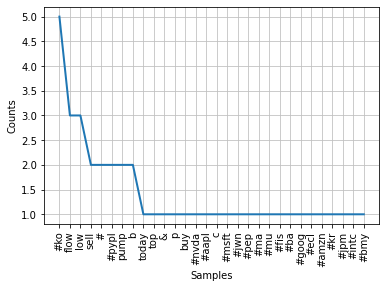

In [59]:
import matplotlib.pyplot as plt
KO_fdist.plot(30,cumulative=False)
plt.show()

### Sentiment analysis

In [60]:
# Vader sentiment
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [61]:
def get_VADER_polarity(text):
    """applies VADER analysis for polarity score"""
    sid = SentimentIntensityAnalyzer()
    polarity_score =  sid.polarity_scores(text)
    return polarity_score

def extract_compound_polarity(input_dict, polarity_score = 'compound'):
    """extract compount score from VADER polarity score"""
    cmp_score = input_dict[polarity_score]
    return cmp_score

In [62]:
smpl.loc[:,'VADER_polarity'] = smpl.loc[:,'filtered_text'].apply(get_VADER_polarity)

In [63]:
smpl.loc[:,['filtered_text','VADER_polarity']].head(3)

,filtered_text,VADER_polarity
0,Market cap is already higher than #dis paid for Jim Henson’s muppets but sure buy out a company ...,"{'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'compound': 0.4497}"
1,#DIS what a move 💪🏻 all out at target Now wait until to play again #SPY #MSFT #AMZN #FB...,"{'neg': 0.0, 'neu': 0.947, 'pos': 0.053, 'compound': 0.34}"
2,#T #DIS #AMC California sets up movie theater reopenings,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"


In [64]:
smpl.loc[:,'VADER_score'] = smpl.loc[:,'VADER_polarity'].apply(extract_compound_polarity)

In [65]:
smpl.loc[:,['text','VADER_score']].head(3)

,text,VADER_score
0,Market cap is already higher than $dis paid for Jim Henson’s muppets but sure buy out a company ...,0.4497
1,$DIS what a move!!!! 💪🏻 all out at $104.95 target. Now wait until $95 to play again $SPY $MSFT $...,0.3400
2,$T $DIS $AMC - California sets up movie theater reopenings https://seekingalpha.com/news/3581360...,0.0000


In [66]:
def VADER_sentiment_classifier(vader_score):
    if vader_score > 0.1 :
        sentiment = 1
    elif vader_score < -0.1:
        sentiment = 0
    else:
        sentiment = 'N'
    return sentiment

In [67]:
smpl.loc[:,'VADER_sentiment'] = smpl.loc[:,'VADER_score'].apply(VADER_sentiment_classifier)

In [68]:
smpl.loc[:,['text','VADER_sentiment']].head(3)

,text,VADER_sentiment
0,Market cap is already higher than $dis paid for Jim Henson’s muppets but sure buy out a company ...,1
1,$DIS what a move!!!! 💪🏻 all out at $104.95 target. Now wait until $95 to play again $SPY $MSFT $...,1
2,$T $DIS $AMC - California sets up movie theater reopenings https://seekingalpha.com/news/3581360...,N


### Process tweets

In [69]:
vader = df.copy()

In [70]:
vader = vader.loc[:,['text','date','ticker']]

In [71]:
vader.head(3)

,text,date,ticker
0,$AMZN $GOOG $AAPL $MSFT Google is the best.... $NKLA $NFLX $DIS $SPX $FB $UBER $LYFT $COST $SPY ...,2020-06-18 23:48:41+00:00,DIS
1,A lot of people ask me what I’m currently in and I’ll be Transparent (goes in order by Portfolio...,2020-06-18 23:25:43+00:00,DIS
2,"Together Everyone Achieves More‼️LIVE! FREE day trade alerts, swing trade alerts, as well as wat...",2020-06-18 23:21:10+00:00,DIS


In [72]:
%%time
vader = filter_documents(vader, filters)

Wall time: 1.47 s


In [73]:
%%time
vader.loc[:,'VADER_polarity'] = vader.loc[:,'filtered_text'].apply(get_VADER_polarity)

Wall time: 8min 29s


In [74]:
%%time
vader.loc[:,'VADER_score'] = vader.loc[:,'VADER_polarity'].apply(extract_compound_polarity)

Wall time: 44.9 ms


In [75]:
%%time
vader.loc[:,'VADER_sentiment'] = vader.loc[:,'VADER_score'].apply(VADER_sentiment_classifier)

Wall time: 15.9 ms


In [76]:
vader.head(5)

,text,date,ticker,filtered_text,VADER_polarity,VADER_score,VADER_sentiment
0,$AMZN $GOOG $AAPL $MSFT Google is the best.... $NKLA $NFLX $DIS $SPX $FB $UBER $LYFT $COST $SPY ...,2020-06-18 23:48:41+00:00,DIS,$AMZN $GOOG $AAPL $MSFT Google is the best $NKLA $NFLX $DIS $SPX $FB $UBER $LYFT $COST $SPY ...,"{'neg': 0.0, 'neu': 0.924, 'pos': 0.076, 'compound': 0.6369}",0.6369,1
1,A lot of people ask me what I’m currently in and I’ll be Transparent (goes in order by Portfolio...,2020-06-18 23:25:43+00:00,DIS,A lot of people ask me what I’m currently in and I’ll be Transparent goes in order by Portfolio...,"{'neg': 0.0, 'neu': 0.924, 'pos': 0.076, 'compound': 0.5106}",0.5106,1
2,"Together Everyone Achieves More‼️LIVE! FREE day trade alerts, swing trade alerts, as well as wat...",2020-06-18 23:21:10+00:00,DIS,Together Everyone Achieves More‼️LIVE FREE day trade alerts swing trade alerts as well as wat...,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.8091}",0.8091,1
3,$DIS Opened and popped this AM forming a 15 min demand zone at 116.84-116.58 which reacted this ...,2020-06-18 23:09:22+00:00,DIS,$DIS Opened and popped this AM forming a min demand zone at which reacted this afternoo...,"{'neg': 0.044, 'neu': 0.792, 'pos': 0.164, 'compound': 0.6249}",0.6249,1
4,#Mixed day $es_f $AAPL #daytrading #marketprofile #futures $spx $nasdaq $zb_f $nq_f $cl_f $GC_f ...,2020-06-18 23:04:56+00:00,DIS,day $es_f $AAPL $spx $nasdaq $zb_f $nq_f $cl_f $GC_f $amzn $XOM $ibm $googl $AVGO $WFM $...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,N


In [77]:
vader.loc[:,'date'] = pd.to_datetime(vader.loc[:,'date']).dt.date

In [78]:
vader_ts = vader[(vader.VADER_sentiment != 'N') & (vader.ticker == 'JPM')].groupby(['ticker','date']).mean()

In [79]:
jpm_price = stock_price[stock_price.ticker == 'JPM']
jpm_price.loc[:,'Date'] = pd.to_datetime(jpm_price.Date)
jpm_price.set_index('Date', inplace=True)
jpm_price = jpm_price['Adj Close']
jpm_price.head()

c:\Users\jaromir\Anaconda3\envs\disProject\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Date
2019-03-18    103.049515
2019-03-19    102.674583
2019-03-20    100.482651
2019-03-21     98.896393
2019-03-22     95.906509
Name: Adj Close, dtype: float64

In [80]:
vader_ts.index = vader_ts.index.droplevel()

In [81]:
vader_ts.head(3)

,VADER_score
date,
2020-04-22,0.047307
2020-04-23,0.075783
2020-04-24,0.267692


In [82]:
sent_price = vader_ts.merge(jpm_price, left_index=True, right_index=True)

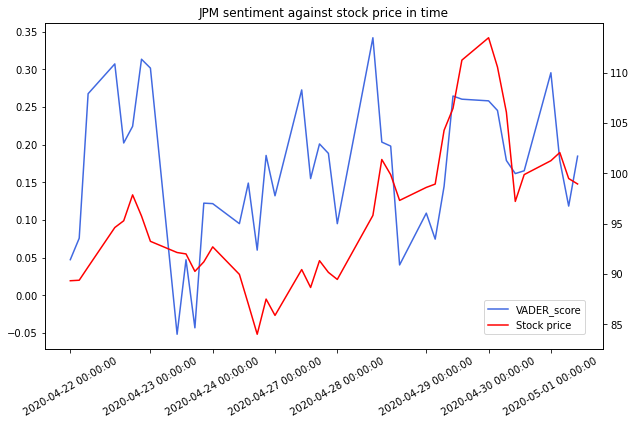

In [83]:
x = sent_price.index
y1 = sent_price.VADER_score
y2 = sent_price['Adj Close']

fig, ax1 = plt.subplots(figsize=(10,6))

ax1.plot(x,y1, c='royalblue', label = 'VADER_score')
ax2 = ax1.twinx()
ax2.plot(x,y2, c ='red', label = 'Stock price')

ax1.set_xticklabels(x,rotation=30)
ax1.set_title('JPM sentiment against stock price in time')
fig.legend(bbox_to_anchor=(0.32, -0.2, 0.5, 0.5))
plt.show()

In [84]:
stock_price

,Date,Open,High,Low,Close,Adj Close,Volume,ticker
0,2019-03-18,113.029999,114.000000,112.459999,113.120003,111.754234,21769800,DIS
1,2019-03-19,112.949997,113.709999,109.800003,110.000000,108.671898,45384400,DIS
2,2019-03-20,110.309998,110.879997,108.050003,109.989998,108.662018,35588700,DIS
3,2019-03-21,110.099998,110.150002,108.370003,108.660004,107.348083,27438900,DIS
4,2019-03-22,108.330002,109.000000,107.510002,108.230003,106.923279,24133800,DIS
...,...,...,...,...,...,...,...,...
1585,2020-06-12,48.040001,48.619999,45.910000,47.169998,47.169998,30968800,XOM
1586,2020-06-15,45.349998,47.759998,44.750000,47.139999,47.139999,27929300,XOM
1587,2020-06-16,49.570000,49.750000,47.240002,48.200001,48.200001,26203400,XOM
1588,2020-06-17,48.000000,48.130001,46.599998,46.630001,46.630001,19251600,XOM


In [85]:
# save file
vader.to_pickle(r"c:\Users\jaromir\OneDrive\UoM\100_Disertation\02_SrcData\03_TMP\VADER.pkl")